In [449]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import datetime

In [450]:
columns_corn = [ 'Date',
            'Corn Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

columns_barley = [ 'Date',
            'Barley Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

df_corn = pd.read_excel('Corn Data.xlsx', header = None, skiprows = 1, names = columns_corn)
df_barley = pd.read_excel('Barley Data.xlsx', header = None, skiprows = 1, names = columns_barley)

In [451]:
df_corn.head()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
1,2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
2,2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
4,2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,...,-5.1,82.325,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5


In [452]:
df_corn.tail()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
630,2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
631,2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
632,2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
633,2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75


In [453]:
df_barley.head()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7650,141.7,178.90,322,843.00,97.93,231.00,30.0500,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
1,2022-02-18,7650,141.7,178.90,322,797.00,93.54,222.50,28.4014,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
2,2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
4,2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.15,...,-5.9,83.425,12.3825,8.100,16.75,31.0,11.25,16.75,0.0,6.00


In [454]:
df_barley.tail()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
630,2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.110,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
631,2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.125,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
632,2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.075,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
633,2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

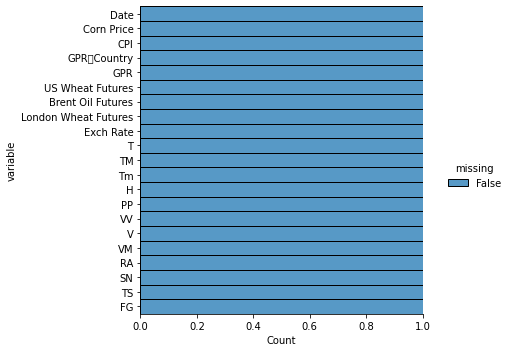

In [455]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_corn.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

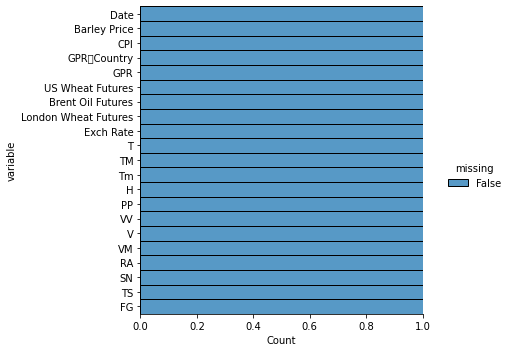

In [456]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_barley.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [457]:
df_corn.index = df_corn["Date"]
df_corn.index = pd.to_datetime(df_corn.index)
df_corn.drop(['Date'], axis='columns', inplace=True)
df_corn = df_corn.sort_index()

In [458]:
df_barley.index = df_barley["Date"]
df_barley.index = pd.to_datetime(df_barley.index)
df_barley.drop(['Date'], axis='columns', inplace=True)
df_barley = df_barley.sort_index()

In [459]:
df_corn["Exchange Rate Change 1"] = df_corn["Exch Rate"].pct_change(periods=1)*100
df_corn["Exchange Rate Change 4"] = df_corn["Exch Rate"].pct_change(periods=4)*100

In [460]:
df_corn.head()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,NaN,NaN
2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.310559,NaN
2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.619195,NaN
2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.184615,NaN
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.739827,0.0


In [461]:
df_corn.tail()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-0.258234,0.149288
2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,1.283816,0.709542
2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,5.804643,4.733757


In [462]:
df_barley["Exchange Rate Change 1"] = df_barley["Exch Rate"].pct_change(periods=1)*100
df_barley["Exchange Rate Change 4"] = df_barley["Exch Rate"].pct_change(periods=4)*100

In [463]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [464]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [465]:
df_corn = df_corn.dropna()
df_barley = df_barley.dropna()

In [466]:
X_train_corn, X_test_corn = train_test_split(df_corn, train_size=0.8, shuffle=False)
X_train_barley, X_test_barley = train_test_split(df_barley, train_size=0.8, shuffle=False)

In [467]:
X_train_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,1210,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,1220,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,1240,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,1240,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4100,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,3600,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,3550,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [468]:
X_test_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,3600,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,3600,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,3650,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,3700,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,3900,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [469]:
X_train_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,845,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,850,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,870,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,860,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4300,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,4000,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,4000,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [470]:
X_test_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,4000,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,4000,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,4000,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,4100,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,4100,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [471]:
y_train_corn = X_train_corn.pop('Corn Price')
y_test_corn = X_test_corn.pop('Corn Price')
y_train_barley = X_train_barley.pop('Barley Price')
y_test_barley = X_test_barley.pop('Barley Price')

In [472]:
y_train_corn

Date
2010-01-29    1230
2010-02-05    1210
2010-02-12    1220
2010-02-19    1240
2010-02-26    1240
              ... 
2019-08-30    4100
2019-09-06    3600
2019-09-13    3550
2019-09-20    3550
2019-09-27    3550
Name: Corn Price, Length: 504, dtype: int64

In [473]:
X_train_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,-14.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,11.7,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [474]:
y_test_corn

Date
2019-10-04    3600
2019-10-11    3600
2019-10-18    3650
2019-10-25    3700
2019-11-01    3900
              ... 
2022-01-28    7750
2022-02-04    7700
2022-02-11    7650
2022-02-18    7750
2022-02-25    7900
Name: Corn Price, Length: 126, dtype: int64

In [475]:
X_test_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,0.5,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,-5.1,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [476]:
y_train_barley

Date
2010-01-29     850
2010-02-05     845
2010-02-12     850
2010-02-19     870
2010-02-26     860
              ... 
2019-08-30    4300
2019-09-06    4000
2019-09-13    4000
2019-09-20    4000
2019-09-27    4000
Name: Barley Price, Length: 504, dtype: int64

In [477]:
X_train_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,-9.6,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,15.2,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [478]:
y_test_barley

Date
2019-10-04    4000
2019-10-11    4000
2019-10-18    4000
2019-10-25    4100
2019-11-01    4100
              ... 
2022-01-28    7600
2022-02-04    7700
2022-02-11    7600
2022-02-18    7650
2022-02-25    7650
Name: Barley Price, Length: 126, dtype: int64

In [479]:
X_test_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,1.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,-5.9,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [480]:
scaler_corn = StandardScaler()
scaler_corn.fit(X_train_corn)
X_train_corn = scaler_corn.transform(X_train_corn)
X_test_corn = scaler_corn.transform(X_test_corn)

In [481]:
scaler_barley = StandardScaler()
scaler_barley.fit(X_train_barley)
X_train_barley = scaler_barley.transform(X_train_barley)
X_test_barley = scaler_barley.transform(X_test_barley)

In [482]:
X_train_corn

array([[-0.58691956, -0.15506529, -0.67301915, ...,  0.70549997,
        -0.19386772, -0.13757746],
       [-0.88615461, -0.7649279 , -0.49995708, ...,  1.43807167,
        -0.0181418 , -0.14491471],
       [-0.88615461, -0.7649279 , -0.49995708, ...,  1.43807167,
        -0.08435197, -0.23237464],
       ...,
       [-0.99496736, -0.22307762,  0.08845394, ..., -0.66807195,
        -0.2634946 , -0.32049875],
       [-0.99496736, -0.22307762,  0.08845394, ..., -0.66807195,
        -0.33938464, -0.46568523],
       [-0.99496736, -0.22307762,  0.08845394, ..., -0.66807195,
        -0.27637627, -0.60892067]])

In [483]:
len(X_train_corn)

504

In [484]:
len(X_test_corn)

126

In [485]:
len(X_train_barley)

504

In [486]:
len(X_test_barley)

126

#knn для кукурудзи

In [487]:
k_list=np.arange(2,50,1)
knn_dict={} # To store k and mse pairs

for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i), algorithm = 'brute')
    model_knn=knn.fit(X_train_corn,y_train_corn)
    y_knn_pred=model_knn.predict(X_train_corn)
#Storing RMSE 
    rmse=np.sqrt(mean_squared_error(y_train_corn,y_knn_pred))
    knn_dict[i]=rmse
knn_dict

{2: 90.17015990944698,
 3: 103.21258733033251,
 4: 124.15214240715186,
 5: 144.88489410453576,
 6: 172.69685046489363,
 7: 201.98612847553136,
 8: 226.6778625287769,
 9: 244.16251368377453,
 10: 262.5782605560991,
 11: 283.0001326015109,
 12: 299.0712777498599,
 13: 318.7365783080982,
 14: 334.2544191530697,
 15: 347.1788580794552,
 16: 356.73780214011026,
 17: 364.4118603938625,
 18: 372.7444172671289,
 19: 377.0071831106763,
 20: 390.60624246392393,
 21: 402.8563921973015,
 22: 414.57278851397865,
 23: 425.266671189571,
 24: 432.7786591485641,
 25: 441.6984046027011,
 26: 450.445831320431,
 27: 458.1940123377532,
 28: 466.8287934519821,
 29: 474.47338398801287,
 30: 483.37357973971643,
 31: 490.49398416314904,
 32: 496.9992609596344,
 33: 503.7458168617085,
 34: 510.4104804959021,
 35: 519.2969426964476,
 36: 528.9016551478024,
 37: 538.0319785265152,
 38: 543.969726035845,
 39: 547.211697766309,
 40: 551.5864338336607,
 41: 555.0670771105221,
 42: 559.9396902296858,
 43: 565.4768665

Text(0, 0.5, 'RMSE')

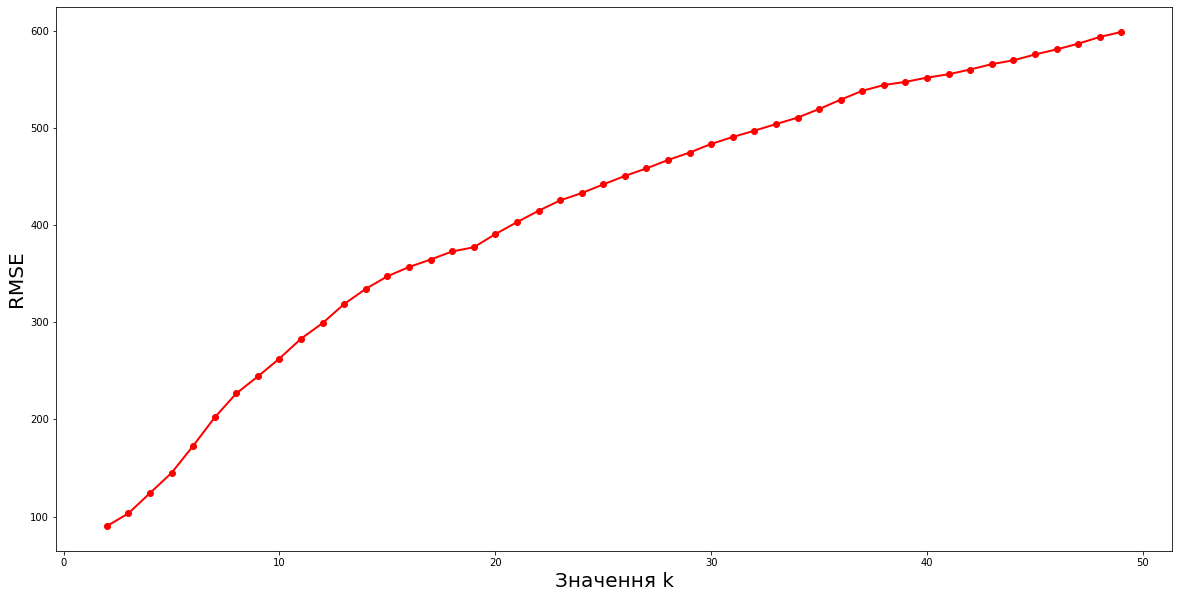

In [488]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(list(knn_dict.keys()),list(knn_dict.values()), color='red', linewidth=2, marker='o')
ax.set_xlabel('Значення k', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
#ax.set_title('Значення параметра k та відповідні їм значення RMSE (для кукурудзи)' ,fontsize=15)

In [489]:
knn=KNeighborsRegressor(n_neighbors=2, algorithm = 'brute')
model_knn=knn.fit(X_train_corn,y_train_corn)
y_knn_pred=model_knn.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_knn_pred))
rmse

90.17015990944698

In [490]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_knn_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1220.0
2010-02-05,1210,1215.0
2010-02-12,1220,1215.0
2010-02-19,1240,1230.0
2010-02-26,1240,1240.0
...,...,...
2019-08-30,4100,4175.0
2019-09-06,3600,3575.0
2019-09-13,3550,3550.0


In [491]:
knn=KNeighborsRegressor(n_neighbors=2, algorithm = 'brute')
model_knn=knn.fit(X_train_corn,y_train_corn)
y_knn_pred=model_knn.predict(X_test_corn)
rmse=np.sqrt(mean_squared_error(y_test_corn,y_knn_pred))
rmse

3793.93741528654

In [492]:
corn_results_test = pd.DataFrame(y_test_corn.copy())
corn_results_test['pred'] = pd.DataFrame(y_knn_pred)[0].values
corn_results_test

,Corn Price,pred
Date,,
2019-10-04,3600,4450.0
2019-10-11,3600,4450.0
2019-10-18,3650,4450.0
2019-10-25,3700,4450.0
2019-11-01,3900,4300.0
...,...,...
2022-01-28,7750,1660.0
2022-02-04,7700,1635.0
2022-02-11,7650,1660.0


In [493]:
corn_pred = pd.concat([corn_results_train, corn_results_test])
corn_pred

,Corn Price,pred
Date,,
2010-01-29,1230,1220.0
2010-02-05,1210,1215.0
2010-02-12,1220,1215.0
2010-02-19,1240,1230.0
2010-02-26,1240,1240.0
...,...,...
2022-01-28,7750,1660.0
2022-02-04,7700,1635.0
2022-02-11,7650,1660.0


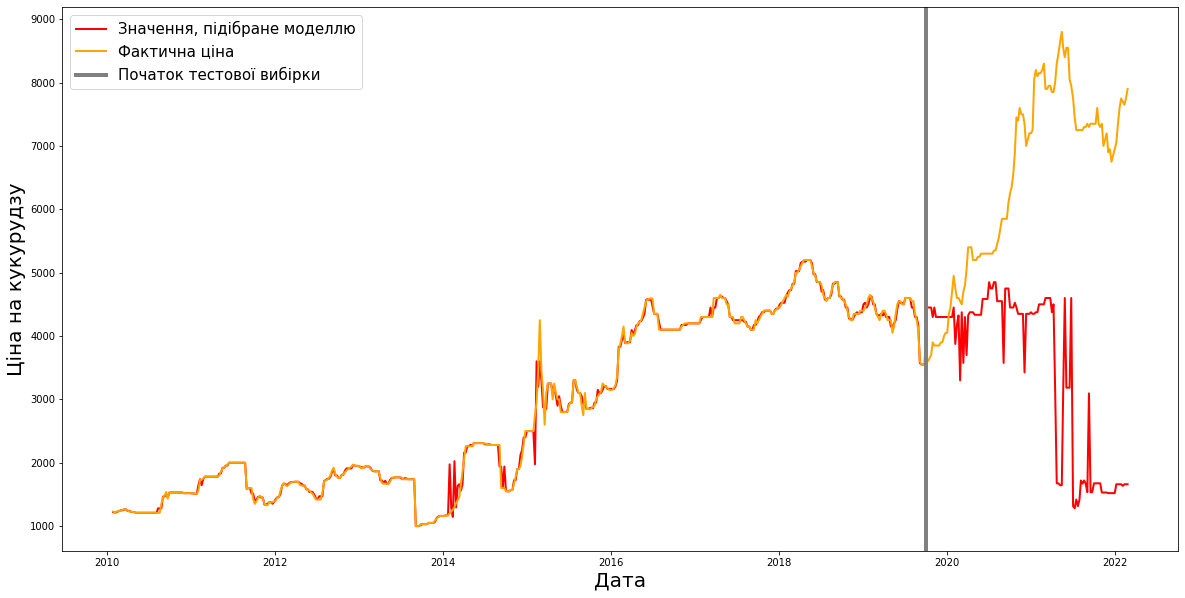

In [494]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_pred.index,corn_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_pred.index,corn_pred['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)

#knn для ячменю

In [495]:
k_list=np.arange(2,50,1)
knn_dict={} # To store k and mse pairs

for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i), algorithm = 'brute')
    model_knn=knn.fit(X_train_barley,y_train_barley)
    y_knn_pred=model_knn.predict(X_train_barley)
#Storing RMSE 
    rmse=np.sqrt(mean_squared_error(y_train_barley,y_knn_pred))
    knn_dict[i]=rmse
knn_dict

{2: 82.50999518576859,
 3: 137.12267853369104,
 4: 147.43267354683178,
 5: 195.7656417963492,
 6: 255.73799237725692,
 7: 308.64027810154965,
 8: 357.0702948979541,
 9: 377.4973071191716,
 10: 395.4665882481539,
 11: 409.30472156223556,
 12: 425.7548144290088,
 13: 436.5196287348147,
 14: 448.6768235000156,
 15: 467.5944485792701,
 16: 478.6944564805828,
 17: 496.0380574047866,
 18: 510.71428727736594,
 19: 529.8018249314541,
 20: 545.1208754480114,
 21: 562.8024981771425,
 22: 579.4176543651539,
 23: 594.7495516848278,
 24: 606.1219087133193,
 25: 618.9884763139971,
 26: 628.0614615287216,
 27: 636.3913856287018,
 28: 646.8172996379182,
 29: 657.4575745654549,
 30: 670.3528110733429,
 31: 682.1105588854123,
 32: 694.0127172078371,
 33: 705.0007573453431,
 34: 714.9936258670302,
 35: 723.396926463415,
 36: 734.4729002647409,
 37: 744.4929852165814,
 38: 754.8404662293983,
 39: 763.2929699113952,
 40: 770.9447263464153,
 41: 779.1076957445719,
 42: 786.1510284375207,
 43: 789.7413096436

Text(0, 0.5, 'RMSE')

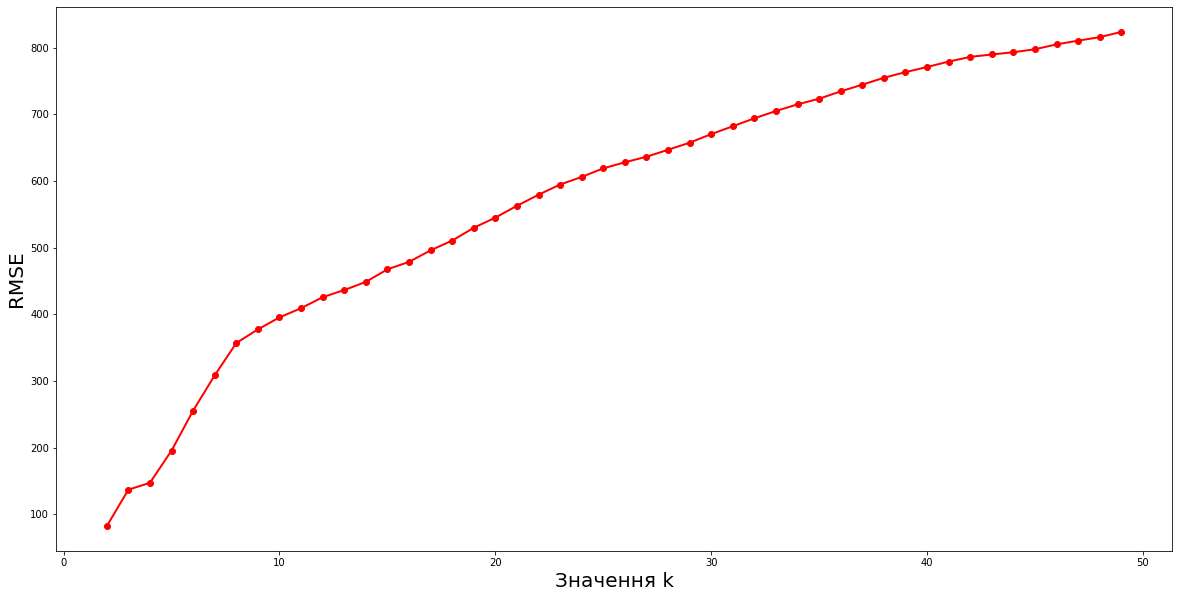

In [496]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(list(knn_dict.keys()),list(knn_dict.values()), color='red', linewidth=2, marker='o')
ax.set_xlabel('Значення k', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
#ax.set_title('Значення параметра k та відповідні їм значення RMSE (для ячменю)' ,fontsize=15)

In [497]:
knn=KNeighborsRegressor(n_neighbors=2, algorithm = 'brute')
model_knn=knn.fit(X_train_barley,y_train_barley)
y_knn_pred=model_knn.predict(X_train_barley)
rmse=np.sqrt(mean_squared_error(y_train_barley,y_knn_pred))
rmse

82.50999518576859

In [498]:
barley_results_train = pd.DataFrame(y_train_barley.copy())
barley_results_train['pred'] = pd.DataFrame(y_knn_pred)[0].values
barley_results_train

,Barley Price,pred
Date,,
2010-01-29,850,847.5
2010-02-05,845,847.5
2010-02-12,850,847.5
2010-02-19,870,860.0
2010-02-26,860,865.0
...,...,...
2019-08-30,4300,4350.0
2019-09-06,4000,4000.0
2019-09-13,4000,4000.0


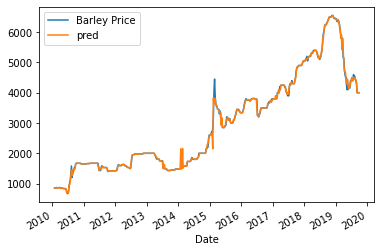

In [499]:
#fig,ax=plt.subplots(figsize=(20,10))
barley_results_train.plot()

In [500]:
knn=KNeighborsRegressor(n_neighbors=2, algorithm = 'brute')
model_knn=knn.fit(X_train_barley,y_train_barley)
y_knn_pred=model_knn.predict(X_test_barley)
rmse=np.sqrt(mean_squared_error(y_test_barley,y_knn_pred))
rmse

3279.655542307831

In [501]:
barley_results_test = pd.DataFrame(y_test_barley.copy())
barley_results_test['pred'] = pd.DataFrame(y_knn_pred)[0].values
barley_results_test

,Barley Price,pred
Date,,
2019-10-04,4000,4900.0
2019-10-11,4000,4900.0
2019-10-18,4000,4900.0
2019-10-25,4100,4900.0
2019-11-01,4100,4450.0
...,...,...
2022-01-28,7600,1575.0
2022-02-04,7700,1575.0
2022-02-11,7600,1575.0


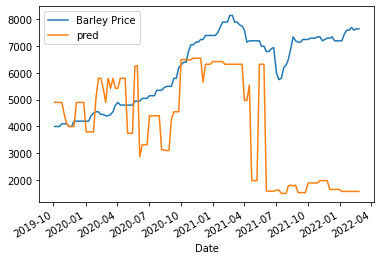

In [502]:
barley_results_test.plot()

In [503]:
barley_pred = pd.concat([barley_results_train, barley_results_test])
barley_pred

,Barley Price,pred
Date,,
2010-01-29,850,847.5
2010-02-05,845,847.5
2010-02-12,850,847.5
2010-02-19,870,860.0
2010-02-26,860,865.0
...,...,...
2022-01-28,7600,1575.0
2022-02-04,7700,1575.0
2022-02-11,7600,1575.0


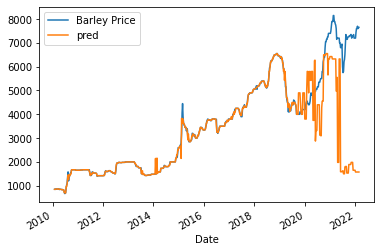

In [504]:
barley_pred.plot()

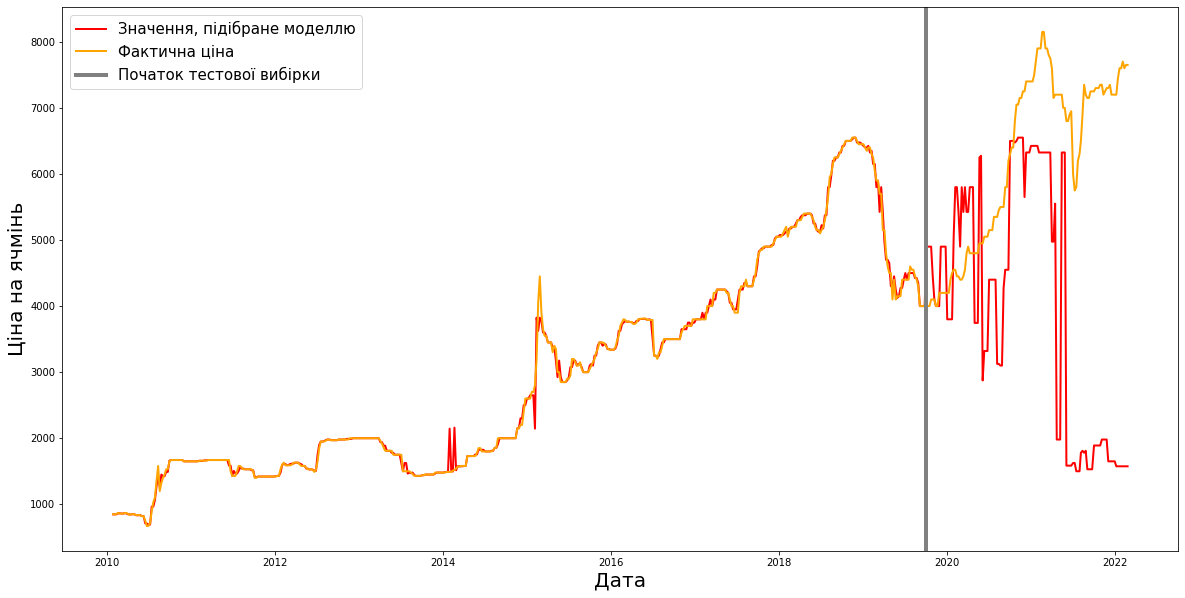

In [505]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(barley_pred.index,barley_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(barley_pred.index,barley_pred['Barley Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на ячмінь' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)